# Lab 8 : Star Formation 

In [39]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function called `StarFormationRate` that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [19]:
# Function that returns the star formation rate given the luminosity of the galaxy.
def StarFormationRate(L,Type,TIR=0):
    """ Function that computes the star formation rate of a galaxy following 
    Kennicutt & Evans 2012 Eq 12 (ARA&A 50)
    
    PARAMETERS
    ----------
        L: `float`
            luminosity of the galaxy in erg/s 
        Type: `string`
            The wavelength : `FUV`, `NUV`, `TIR`, `Halpha`
        TIR: `float`
            Total Infrared Luminosity in erg/s (default = 0)
    OUTPUTS
    -------
        SFR: `float`
            Log of the Star Formation Rate (Msun/year)
    """
    
    if (Type == 'FUV'):
        logCx = 43.35 # Calibration from L to SFR from Table 1 (K&E 2012)
        TIRc = 0.46 # Correction for dust absorption from Table 2 (K&E 2012)
    elif (Type == 'NUV'):
        logCx = 43.17
        TIRc = 0.27
    elif (Type =='Halpha'):
        logCx = 41.27
        TIRc = 0.0024
    elif (Type =='TIR'):
        logCx = 43.41
        TIRc = 0
    else:
        print("WARNING: Missing Wavelength. Expecting FUV, NUV, Halpha, TIR")
        
    # Correct the Luminosity for dust using IR luminosity
    Lnew = L + TIRc*TIR
    
    # star formation rate
    SFR = np.log10(Lnew) - logCx
    
    return SFR



Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 
(WLM Dwarf Irregular and the NGC 24 Sc galaxy)

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [20]:
# First need the Luminosity of the Sun in the right units (erg/s)
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [21]:
LsunErgS = const.L_sun.to(u.erg/u.s).value # don't need the units themselves. 

In [22]:
# Test
StarFormationRate(1e6*LsunErgS, 'blah', 5e6*LsunErgS)


UnboundLocalError: local variable 'TIRc' referenced before assignment

In [11]:
#  WLM Dwarf Irregular Galaxy
#  From NED First table in Phot & SED:  WLM NUV luminosity (GALEX) 1.71e7 Lsun 
#  From NED: WLM NIR luminosity (IRAC) 2.48e6 Lsun,  MIR 3.21e5 Lsun, FIR 2.49e6 Lsun

NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS + 3.21e05*LsunErgS + 2.49e06*LsunErgS


In [12]:
# Determine the star formation rate. 
StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)

#  Lee et al. 2009  WLM galaxy log(SFR) derived from UV is -2.21 --> Galex
# using older Kennicutt relations 

-2.319186168309912

In [5]:
# Don't do this one. 

#  NGC 24 Sc galaxy
# Lee et al. 2009 NGC 24 log(SFR) derived from UV as -0.7
# From NED: NGC 24 NUV luminosity (GALEX) 2.96e8 Lsun
# From NED: NGC 24 FIR luminosity (MIPS) 3.09e8 Lsun 
# From NED : NGC 24 NIR luminosity (2MASS) 8.34e8 Lsun

NUV_N24 = 2.96e8*LsunErgS
TIR_N24 = 3.09e8*LsunErgS + 8.34e8*LsunErgS


StarFormationRate(NUV_N24, 'NUV', TIR_N24)
# -0.7 is in Lee et al. using older Kennicutt relations


-0.8055527449424105

# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# step 1

In [23]:
def SFRMainSequence(Mstar,z):
    """ Function that computes the average SFR of a galaxy 
    as a function of stellar mass and redshift
    PARAMETERS
    ----------
        z: 'float'
            redshift
        Mstar: 'float' 
            Stellar mass of the galaxy in Msun 
    OUTPUTS
    -------
        logSFR: 'float'
            log(SFR (Msun/year))"""

    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2 
 
    logSFR = alpha*(np.log10(Mstar) - 10.5) + beta
    
    return logSFR
    
    

# step 2

In [28]:
# MW at z=0
# Homework 3 stellar mass of MW disk
MW_disk = 7.5e10


In [29]:
# SFR of MW at z=0
print(10**SFRMainSequence(MW_disk, 0))
# actual star formation rate of the MW is only 1 Msun/year
# So MW is slightly below the SFR MS (see plot)

4.390792203431891


In [31]:
print(SFRMainSequence(MW_disk, 0))
# in log space

0.64254288437419


In [28]:
# MW at z = 1
print(10**SFRMainSequence(MW_disk, 4))


93.87635047080212


# step 3

In [45]:
# create an array of stellar masses
Mass = np.linspace(1e8, 1e12)

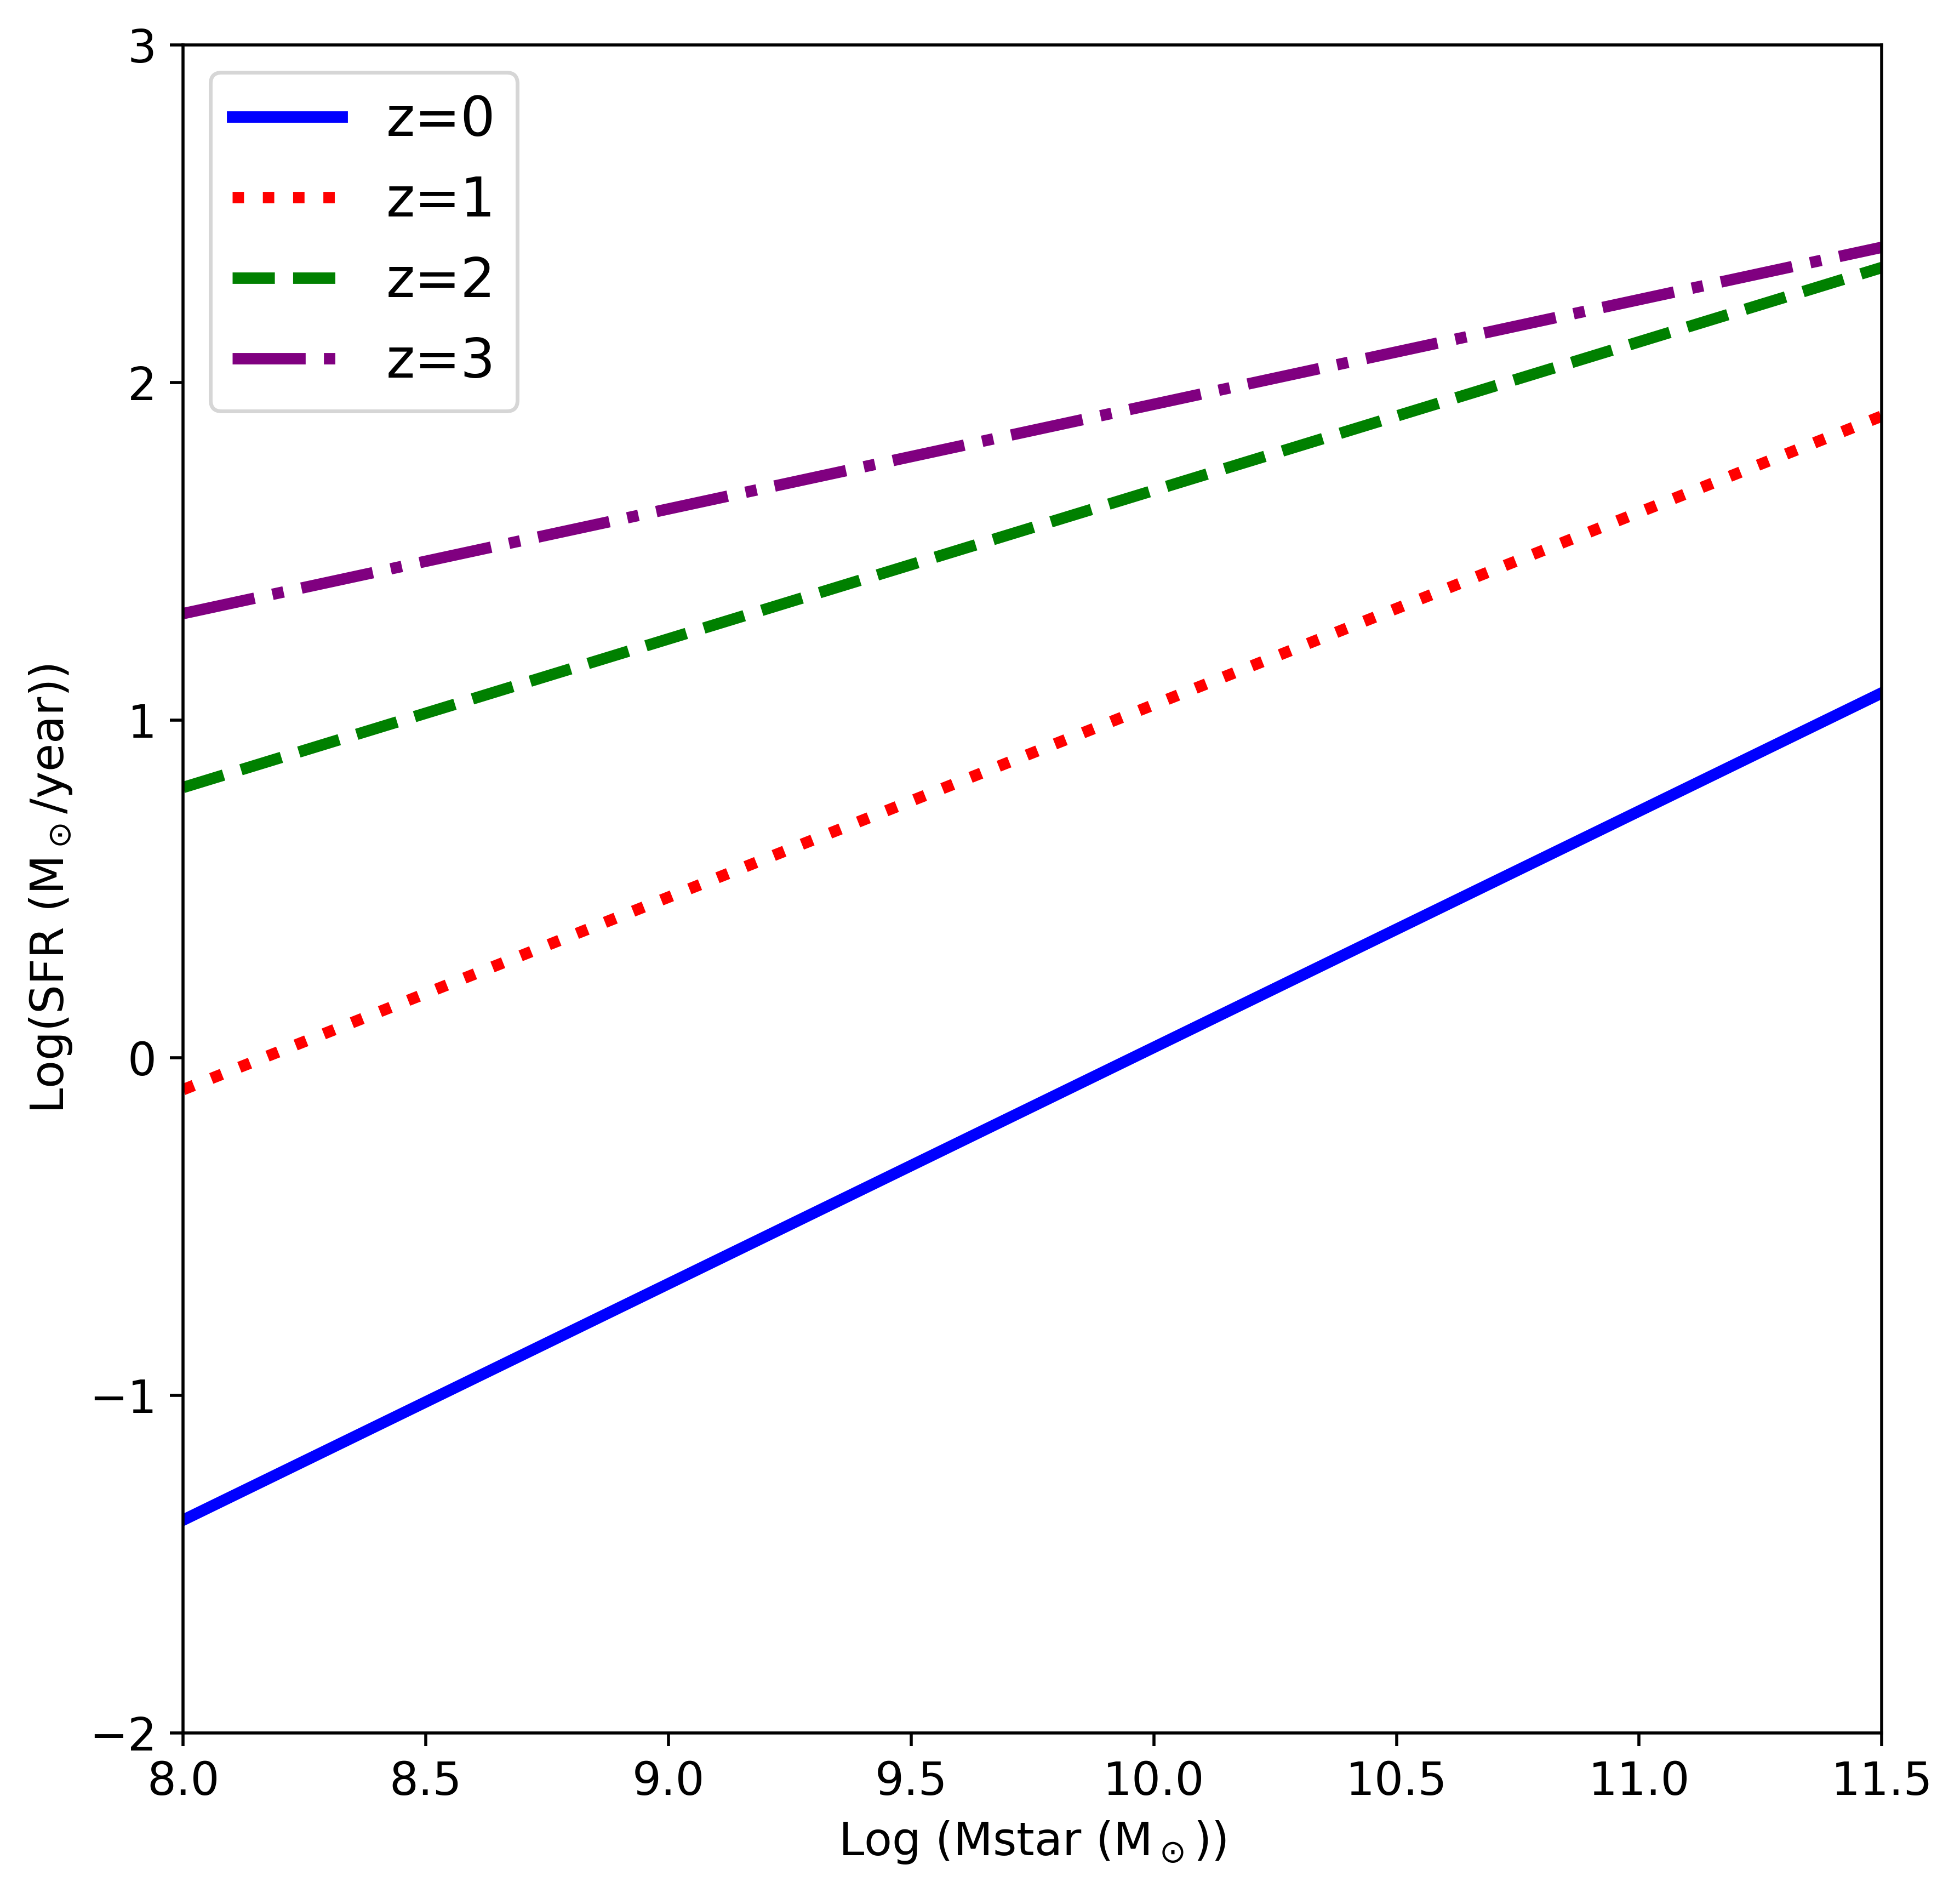

In [47]:
# Figure to match Whitaker+2012

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.plot(np.log10(Mass), SFRMainSequence(Mass,0), 
         color='blue', linewidth=3, label='z=0')
plt.plot(np.log10(Mass), SFRMainSequence(Mass,1), 
         color='red', linestyle=":", linewidth=3, label='z=1')
plt.plot(np.log10(Mass), SFRMainSequence(Mass,2), 
         color='green', linestyle="--", linewidth=3, label='z=2')
plt.plot(np.log10(Mass), SFRMainSequence(Mass,3), 
         color='purple', linestyle="-.", linewidth=3, label='z=3')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)

plt.ylim(-2,3)
plt.xlim(8,11.5)
#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')

# Save Fig
plt.savefig('Lab8_SFR_MainSequence.png')


 over all the SFR decreases at all mass bins as a function of time


expect the star formation rate to always be dominated by massive galaxies --> BUT QUENCHING. 


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [36]:
# normal galaxies  Lir = 10^10 Lsun 
# assuming 

TIR_Normal = 1e10*LsunErgS
print(10**StarFormationRate(TIR_Normal, "TIR"))


1.4892648150381245


In [37]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS
print(10**StarFormationRate(TIR_LIRG, "TIR"))


14.892648150381245


In [38]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS
print(10**StarFormationRate(TIR_ULIRG, "TIR"))



148.92648150381245


In [39]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS
print(10**StarFormationRate(TIR_HLIRG, "TIR"))



1489.2648150381244
